In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa 
import pandas as pd
import random
import os
import seaborn as sns

RMS (root mean square) 均方根  
我對librosa所讀取出來的資料，算RMS

In [3]:
# Audio params
SAMPLE_RATE = 22050  # (samples/sec)
DURATION = 5.0  # duration in second (sec)
AUDIO_LEN = int(SAMPLE_RATE * DURATION)  # total number of samples in DURATION

# Spectrogram params
N_MELS = 128  # freq axis, number of filters
N_FFT = 2048  # frame size
HOP_LEN = 512  # non-overlap region, which means 1/4 portion overlapping
SPEC_WIDTH = AUDIO_LEN // HOP_LEN + 1  # time axis
FMAX = SAMPLE_RATE // 2  # max frequency, based on the rule, it should be half of SAMPLE_RATE
SPEC_SHAPE = [N_MELS, SPEC_WIDTH]  # expected output spectrogram shape

def load_audio(filepath, sr=SAMPLE_RATE):  # load the audio
    audio, sr = librosa.load(filepath, sr=sr)
    return audio, sr

In [4]:
def write_to_csv(audio_source_folder, csv_filename, label, func, val):
    # 讀取資料夾內的所有音檔
    audio_files = [f for f in os.listdir(audio_source_folder) if f.endswith(('.wav', '.mp3'))]
    random.shuffle(audio_files)
    audio_files = audio_files[:1000]     # 隨機取前500筆資料

    chroma_stft_mean = []
    results = []
    for audio_file in audio_files:
        # 完整的音檔路徑
        file_path = os.path.join(audio_source_folder, audio_file)
        audio, sr = load_audio(file_path, sr=SAMPLE_RATE)
        # 將檔案名與chroma_stft_mean包在一個list中存入results
        mean = func(audio, sr=SAMPLE_RATE).tolist()
        results.append([audio_file] + mean + [label])

    # Convert the results to a pandas DataFrame
    columns = ['Audio_name'] + [f'{val}_{i+1}' for i in range(len(mean))] + ['Label']
    df = pd.DataFrame(results, columns=columns)

    # Check if CSV file exists
    if not os.path.isfile(csv_filename):
        # If file does not exist, write a new CSV file
        df.to_csv(csv_filename, index=False)
    else:
        # If file exists, append new content to the existing CSV file
        df.to_csv(csv_filename, mode='a', header=False, index=False)

In [16]:
# rms會回傳一個list，裡面包含了所有frame的rms值
# 這裡我們取平均值
def RMS_mean(audio, sr=SAMPLE_RATE):
    rms = librosa.feature.rms(y=audio, frame_length=N_FFT, hop_length=HOP_LEN)
    return np.mean(rms, axis=1)

In [17]:
write_to_csv('D:/CFAD/CFAD/clean_version/train_clean/real_clean/thchs30', 'RMS.csv', True, RMS_mean, 'RMS')
print(f"RMS saved to RMS.csv")

write_to_csv('D:/chou_fake', 'RMS.csv', False, RMS_mean, 'RMS')

write_to_csv('D:/lin_fake/1-100', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/lin_fake/101-200', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/lin_fake/201-300', 'RMS.csv', False, RMS_mean, 'RMS')

write_to_csv('D:/CFAD/elevenlabs/Adam', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Alice', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Antoni', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Brian', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Clyde', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Dave', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Domi', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Drew', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Emily', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Fin', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Josh', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Lily', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Paul', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Rachel', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Sam', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Sarah', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/Thomas', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech', 'RMS.csv', False, RMS_mean, 'RMS')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech/TTS', 'RMS.csv', False, RMS_mean, 'RMS')

RMS saved to RMS.csv


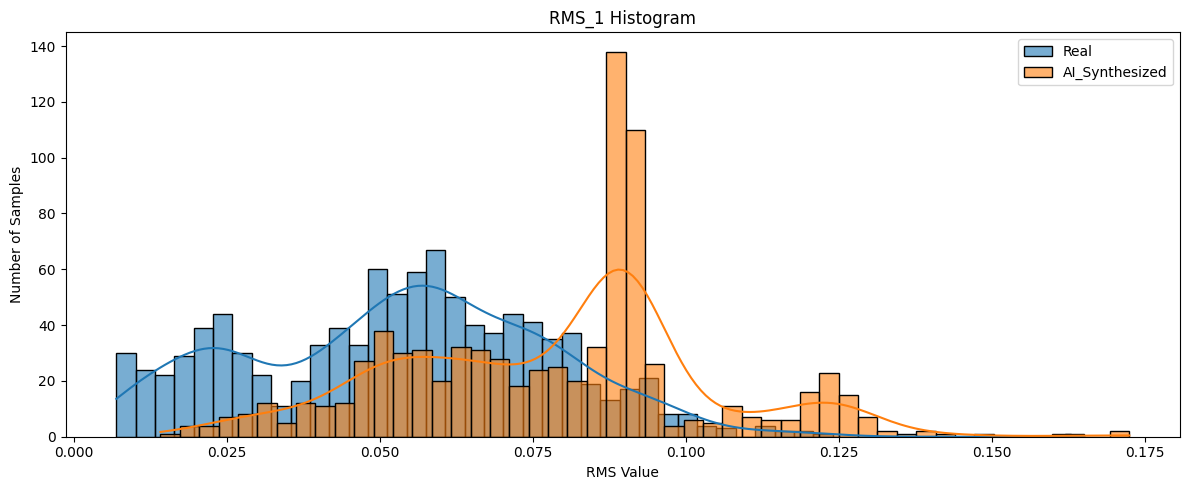

In [18]:
csv_filename = 'RMS.csv'
# 讀取 CSV 文件中的數據
df = pd.read_csv(csv_filename)

# 獲取所有標籤
labels = df['Label'].unique()   # [True, False]
# 分成真實(True)和合成(False)兩類
real_label = df[df['Label'] == labels[0]]
fake_label = df[df['Label'] == labels[1]]

# 根據標籤分組並繪製 Chroma 直方圖
count = 1
fig, axs = plt.subplots(1, 1, figsize=(12, 5)) 

col = df.columns[count]
sns.histplot(data=real_label, x=col, kde=True, bins=50, alpha=0.6, label='Real', ax=axs)
sns.histplot(data=fake_label, x=col, kde=True, bins=50, alpha=0.6, label='AI_Synthesized', ax=axs)
axs.set_title(f'RMS_{count} Histogram')
axs.set_xlabel(f'RMS Value')
axs.set_ylabel('Number of Samples')
axs.legend()

plt.tight_layout()
plt.show()

zero crossing rate

In [19]:
def zcr_mean(audio, sr=SAMPLE_RATE):
    zcr = librosa.feature.zero_crossing_rate(y=audio, frame_length=N_FFT, hop_length=HOP_LEN)
    return np.mean(zcr, axis=1)

In [30]:
write_to_csv('D:/CFAD/CFAD/clean_version/train_clean/real_clean/thchs30', 'zcr.csv', True, zcr_mean, 'ZCR')
print(f"ZCR saved to zcr.csv")

write_to_csv('D:/chou_fake', 'zcr.csv', False, zcr_mean, 'ZCR')

write_to_csv('D:/lin_fake/1-100', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/lin_fake/101-200', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/lin_fake/201-300', 'zcr.csv', False, zcr_mean, 'ZCR')

write_to_csv('D:/CFAD/elevenlabs/Adam', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Alice', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Antoni', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Brian', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Clyde', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Dave', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Domi', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Drew', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Emily', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Fin', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Josh', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Lily', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Paul', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Rachel', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Sam', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Sarah', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/Thomas', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech', 'zcr.csv', False, zcr_mean, 'ZCR')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech/TTS', 'zcr.csv', False, zcr_mean, 'ZCR')

ZCR saved to zcr.csv


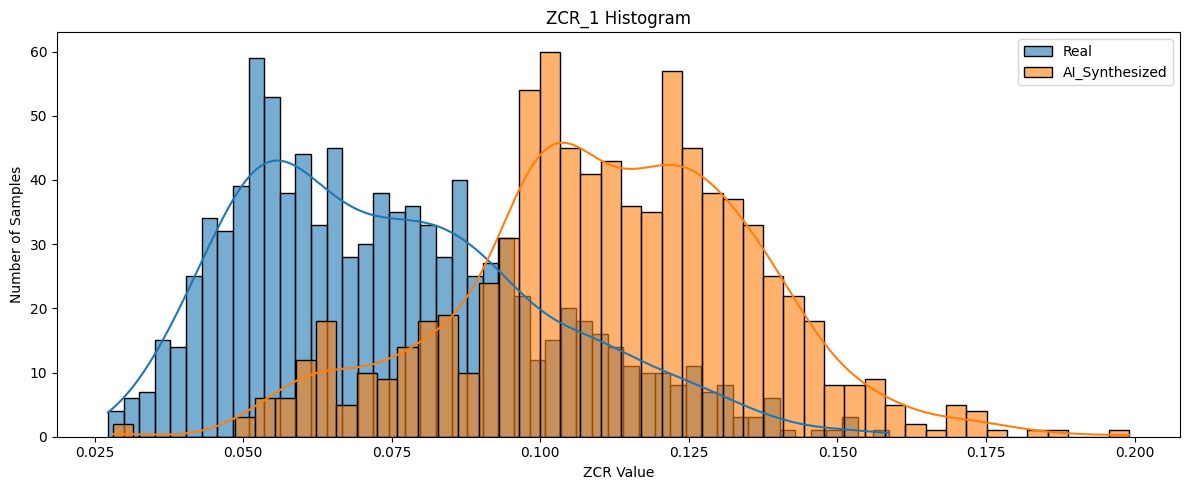

In [31]:
csv_filename = 'zcr.csv'
# 讀取 CSV 文件中的數據
df = pd.read_csv(csv_filename)

# 獲取所有標籤
labels = df['Label'].unique()   # [True, False]
# 分成真實(True)和合成(False)兩類
real_label = df[df['Label'] == labels[0]]
fake_label = df[df['Label'] == labels[1]]

# 根據標籤分組並繪製 Chroma 直方圖
count = 1
fig, axs = plt.subplots(1, 1, figsize=(12, 5)) 

col = df.columns[count]
sns.histplot(data=real_label, x=col, kde=True, bins=50, alpha=0.6, label='Real', ax=axs)
sns.histplot(data=fake_label, x=col, kde=True, bins=50, alpha=0.6, label='AI_Synthesized', ax=axs)
axs.set_title(f'ZCR_{count} Histogram')
axs.set_xlabel(f'ZCR Value')
axs.set_ylabel('Number of Samples')
axs.legend()

plt.tight_layout()
plt.show()

spectral centroid

In [27]:
def spec_centroid_mean(audio, sr=SAMPLE_RATE):
    spec_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr, n_fft=N_FFT, hop_length=HOP_LEN)
    return np.mean(spec_centroid, axis=1)

# audio, sr = load_audio('D:/CFAD/CFAD/clean_version/train_clean/real_clean/thchs30/A4_184.wav', sr=SAMPLE_RATE)
# mean = spec_centroid_mean(audio, sr=SAMPLE_RATE)

[1824.02209807]


In [33]:
write_to_csv('D:/CFAD/CFAD/clean_version/train_clean/real_clean/thchs30', 'sc.csv', True, spec_centroid_mean, 'spectral_cendtroid')
print(f"spectral centroid saved to sc.csv")

write_to_csv('D:/chou_fake', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')

write_to_csv('D:/lin_fake/1-100', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/lin_fake/101-200', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/lin_fake/201-300', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')

write_to_csv('D:/CFAD/elevenlabs/Adam', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Alice', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Antoni', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Brian', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Clyde', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Dave', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Domi', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Drew', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Emily', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Fin', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Josh', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Lily', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Paul', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Rachel', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Sam', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Sarah', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/Thomas', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech/TTS', 'sc.csv', False, spec_centroid_mean, 'spectral_cendtroid')

spectral centroid saved to sc.csv


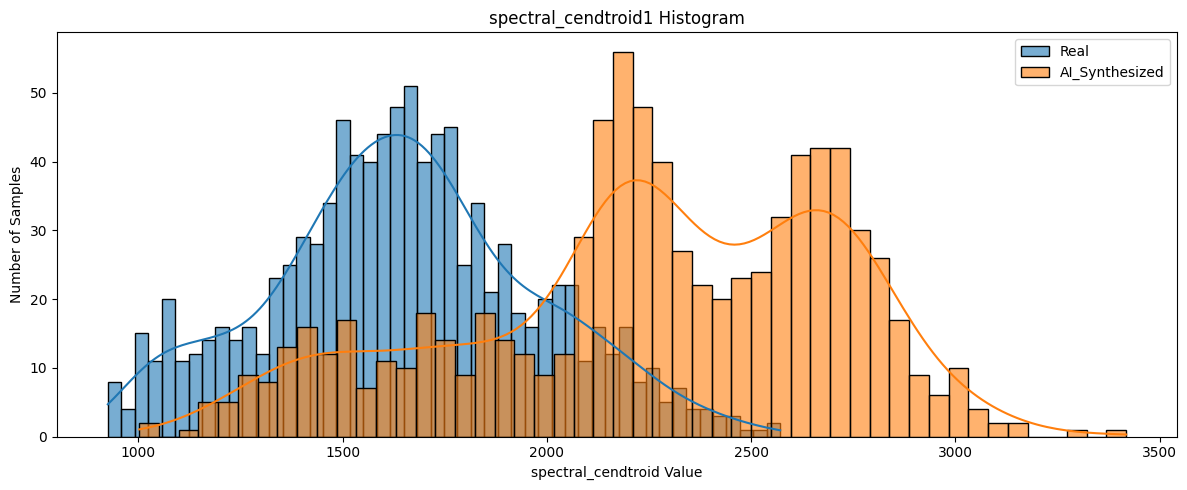

In [34]:
csv_filename = 'sc.csv'
# 讀取 CSV 文件中的數據
df = pd.read_csv(csv_filename)

# 獲取所有標籤
labels = df['Label'].unique()   # [True, False]
# 分成真實(True)和合成(False)兩類
real_label = df[df['Label'] == labels[0]]
fake_label = df[df['Label'] == labels[1]]

# 根據標籤分組並繪製 Chroma 直方圖
count = 1
fig, axs = plt.subplots(1, 1, figsize=(12, 5)) 

col = df.columns[count]
sns.histplot(data=real_label, x=col, kde=True, bins=50, alpha=0.6, label='Real', ax=axs)
sns.histplot(data=fake_label, x=col, kde=True, bins=50, alpha=0.6, label='AI_Synthesized', ax=axs)
axs.set_title(f'spectral_cendtroid{count} Histogram')
axs.set_xlabel(f'spectral_cendtroid Value')
axs.set_ylabel('Number of Samples')
axs.legend()

plt.tight_layout()
plt.show()

Tonnetz 

In [45]:
def tonnetz_mean(audio, sr=SAMPLE_RATE):
    tonnetz = librosa.feature.tonnetz(y=audio, sr=sr, hop_length=HOP_LEN)
    tonnetz_mean = np.mean(tonnetz, axis=1)
    return tonnetz_mean

# audio, sr = load_audio('D:/CFAD/CFAD/clean_version/train_clean/real_clean/thchs30/A4_184.wav', sr=SAMPLE_RATE)
# mean = tonnetz_mean(audio, sr=SAMPLE_RATE)
# print(mean.shape)

(6,)


In [ ]:
write_to_csv('D:/CFAD/CFAD/clean_version/train_clean/real_clean/thchs30', 'tonnetz.csv', True, tonnetz_mean, 'tonnetz')
print(f"tonnetz saved to tonnetz.csv")

write_to_csv('D:/chou_fake', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')

write_to_csv('D:/lin_fake/1-100', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/lin_fake/101-200', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/lin_fake/201-300', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')

write_to_csv('D:/CFAD/elevenlabs/Adam', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Alice', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Antoni', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Brian', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Clyde', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Dave', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Domi', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Drew', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Emily', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Fin', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Josh', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Lily', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Paul', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Rachel', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Sam', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Sarah', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/Thomas', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')
write_to_csv('D:/CFAD/elevenlabs/SpeechToSpeech/TTS', 'tonnetz.csv', False, tonnetz_mean, 'tonnetz')

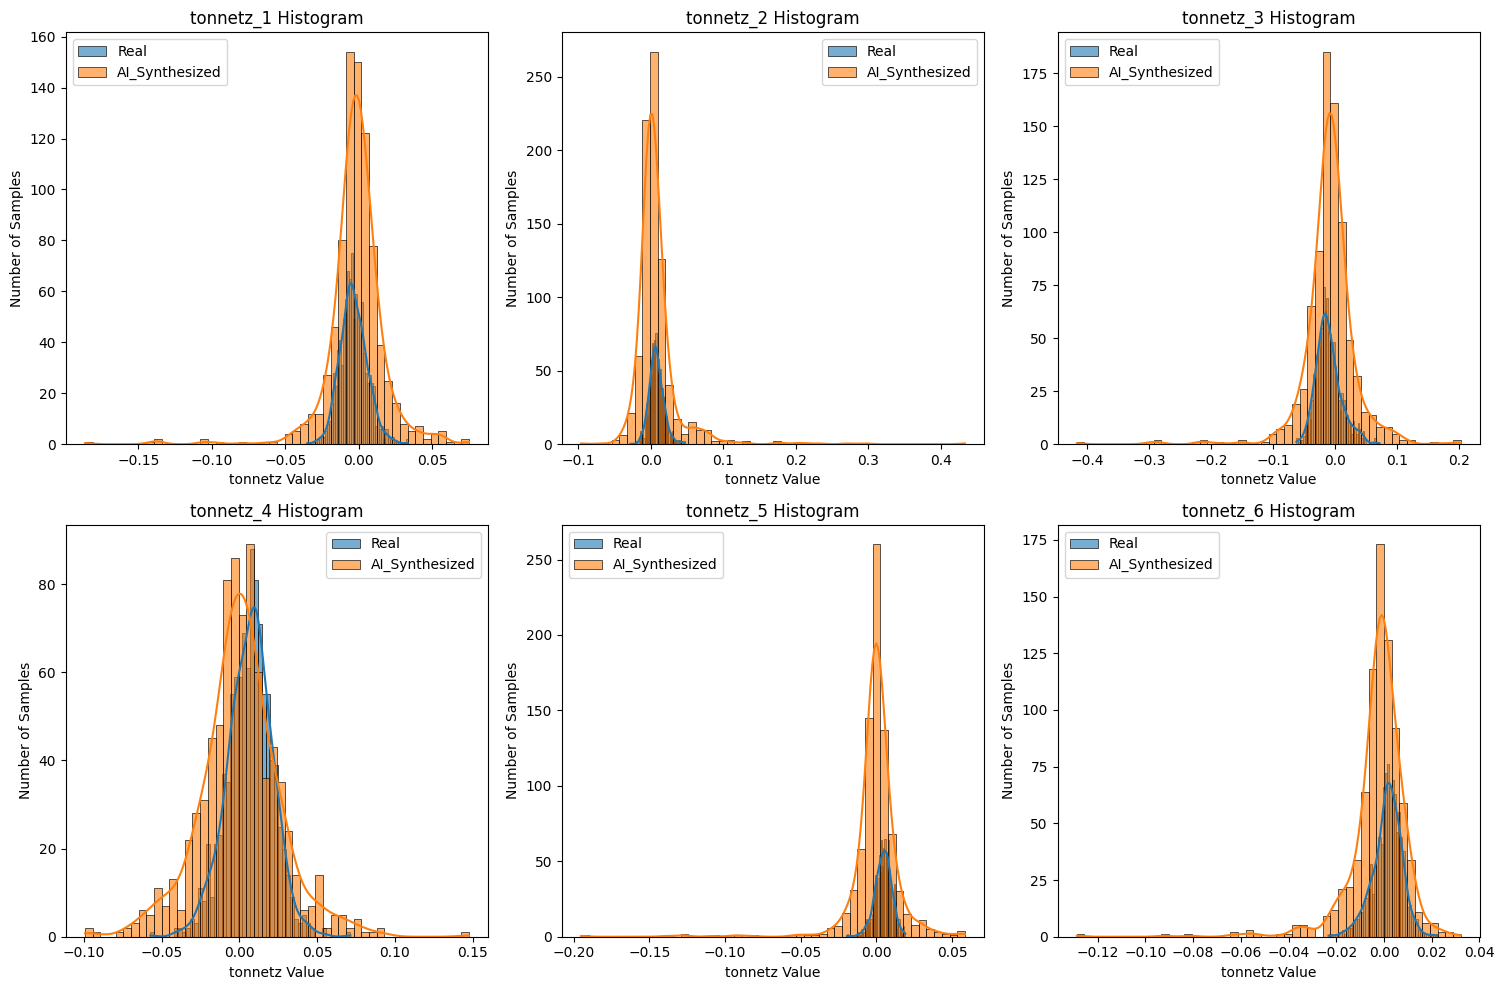

In [47]:
def draw_distribution(csv_filename, rows, cols, max_count, val):
    # 讀取 CSV 文件中的數據
    df = pd.read_csv(csv_filename)

    # 獲取所有標籤
    labels = df['Label'].unique()   # [True, False]
    # 分成真實(True)和合成(False)兩類
    real_label = df[df['Label'] == labels[0]]
    fake_label = df[df['Label'] == labels[1]]

    # 根據標籤分組並繪製 Chroma 直方圖
    count = 1
    fig, axs = plt.subplots(rows, cols, figsize=(15, 10)) 

    count = 1
    for i in range(rows):
        for j in range(cols):
            col = df.columns[count]
            sns.histplot(data=real_label, x=col, kde=True, bins=50, alpha=0.6, label='Real', ax=axs[i, j])
            sns.histplot(data=fake_label, x=col, kde=True, bins=50, alpha=0.6, label='AI_Synthesized', ax=axs[i, j])
            axs[i, j].set_title(f'{val}_{count} Histogram')
            axs[i, j].set_xlabel(f'{val} Value')
            axs[i, j].set_ylabel('Number of Samples')
            axs[i, j].legend()
            count += 1
            if count > max_count:
                break

    plt.tight_layout()
    plt.show()

draw_distribution('tonnetz.csv', 2, 3, 6, 'tonnetz')

spectral_bandwidth 圖形化  
來自librosa的範例程式

In [61]:
import matplotlib.cm as cm
def plot_bandwidth(filepath):
    # 先讀取音檔算bandwidth
    y, sr = librosa.load(filepath, sr=SAMPLE_RATE)
    y = y[:AUDIO_LEN]   # 取前5秒的音檔
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    # make spectrogram input into magnitude and phase components
    S, phase = librosa.magphase(librosa.stft(y=y))

    fig, ax = plt.subplots(nrows=2, sharex=True)
    # Return an array of sample indices to match the time axis from a feature matrix.
    times = librosa.times_like(spec_bw)
    centroid = librosa.feature.spectral_centroid(S=S)   # frequency bandwidth for each frame
    # Make a plot with log scaling on the y-axis.
    ax[0].semilogy(times, spec_bw[0], label='Spectral bandwidth')
    ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
    ax[0].legend()
    ax[0].label_outer() # 用來隱藏坐標軸的內部標籤，只顯示外部標籤。

    # Display a spectrogram
    librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                            y_axis='log', x_axis='time', ax=ax[1], cmap='viridis')
    ax[1].set(title='log Power spectrogram')
    ax[1].fill_between(times, np.maximum(0, centroid[0] - spec_bw[0]),
                    np.minimum(centroid[0] + spec_bw[0], sr/2),
                    color='darkgoldenrod', alpha=0.5, label='Centroid +- bandwidth')
    ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
    ax[1].legend(loc='lower right')

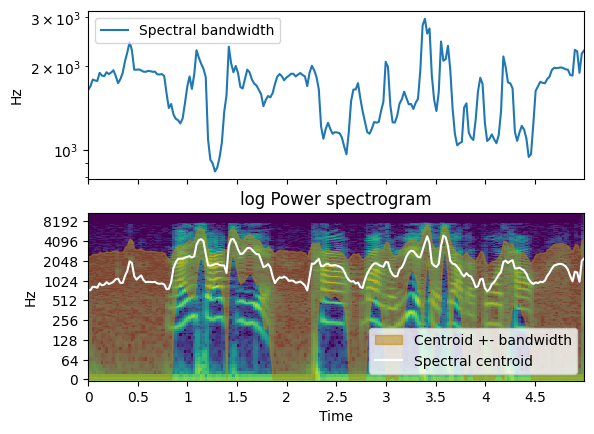

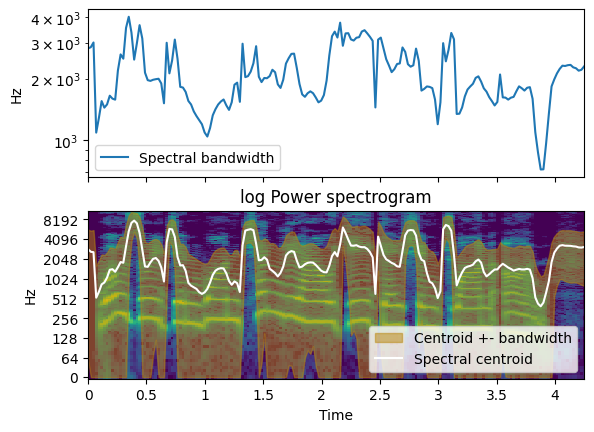

In [64]:
plot_bandwidth('D:/CFAD/CFAD/clean_version/train_clean/real_clean/thchs30/A4_184.wav')
plot_bandwidth('D:/CFAD/elevenlabs/Alice/ElevenLabs_2024-04-01T11_30_12_Alice_pre_s50_sb75_t2.mp3')

elevanlab挑了兩個出來，發現跟CFAD當中的thchs30相比，頻率較高

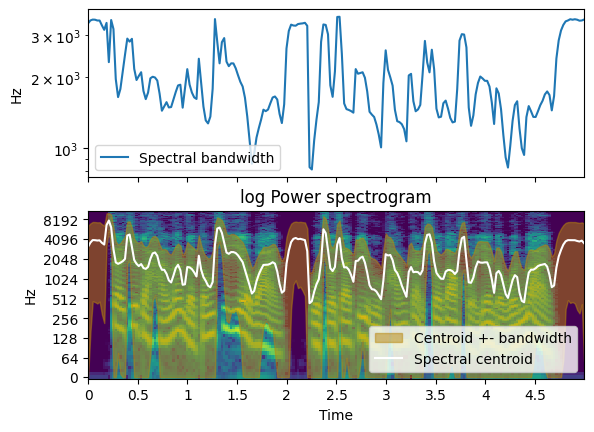

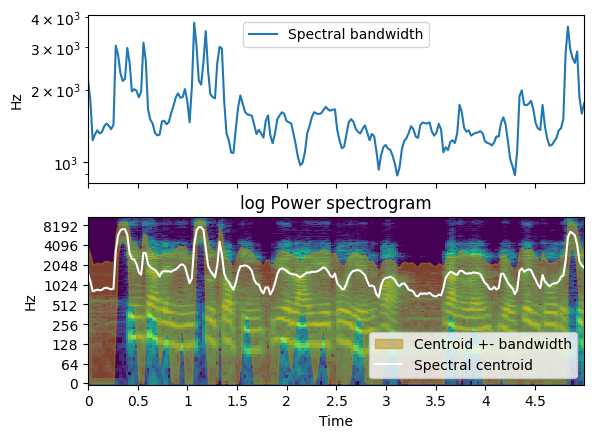

In [65]:
plot_bandwidth('D:/lin_fake/101-200/output(128).wav')
plot_bandwidth('D:/chou_fake/fake_zh_speaker_0_ID_44.wav')

* Lin合成語音則是會有間隔停頓的情況
* Chou合成語音則是波風處才有微小頻寬變化，其餘變化大(黃色區塊多)  
  
但這個結論有待討論:  
1. 因為強制取`前5秒`，有可能失準。
2. 目前只是簡單測試